In [5]:
# Load packages
import pandas as pd 
import numpy as np
import logging
import pickle
import random
import plotly 
import os
from pathlib import Path

import mlflow
from mlflow.tracking import MlflowClient
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline, FeatureUnion
from sklearn.feature_selection import VarianceThreshold
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

from sklearn.decomposition import PCA, KernelPCA

from matplotlib import pyplot as plt
import xgboost as xgb


In [6]:
EXPERIMENT_NAME = "job-profile-prediction"
TRACKING_URI = "../mlflow"


In [7]:
# Create an instance of MlflowClient
client = MlflowClient(tracking_uri=TRACKING_URI)

# Get the experiment ID based on the experiment name
experiment_id = client.get_experiment_by_name(EXPERIMENT_NAME).experiment_id

# Get the runs information for the experiment
runs = client.search_runs(experiment_ids=[experiment_id])

# Create an empty dictionary to store the metrics
metrics_dict = {}

# Iterate over the runs
for run in runs:
    # Get the run ID
    run_id = run.info.run_id
    
    # Get the metrics for the run
    metrics = client.get_run(run_id).data.metrics
    
    # Get the model name for the run
    model_name = client.get_run(run_id).data.tags.get("mlflow.runName")
    
    # Store the metrics in the dictionary
    metrics_dict[run_id] = (model_name, metrics)

# Print the metrics and model name for each run
for run_id, (model_name, metrics) in metrics_dict.items():
    print(f"Metrics for run {run_id} (Model: {model_name}):")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value}")
    print()


Metrics for run 7396a38eb17e42898bc5586415caf600 (Model: xgboost):
precision_score: 98.99234042553194
accuracy_score: 99.5314893617021
recall_score: 82.05170212765957
f1_score: 88.53914893617019

Metrics for run 4ed585893a244f9e8d5b2d6fdf2d4c7a (Model: logistic_regression):
precision_score: 62.15723404255319
accuracy_score: 98.13489361702128
recall_score: 37.32
f1_score: 44.01595744680852



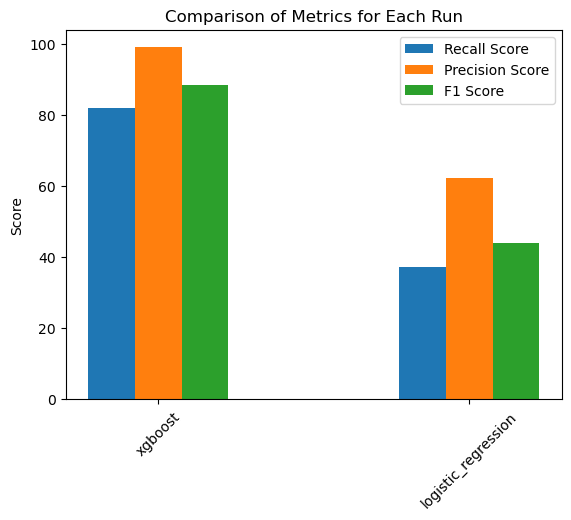

In [8]:
import matplotlib.pyplot as plt

# Extract the model names and metrics from the dictionary
model_names = []
recall_score = []
f1_scores = []
precision_scores = []

for run_id, (model_name, metrics) in metrics_dict.items():
    model_names.append(model_name)
    recall_score.append(round(metrics.get("recall_score"), 2))
    precision_scores.append(round(metrics.get("precision_score"), 2))
    f1_scores.append(round(metrics.get("f1_score") ,2))


# Set the x-axis positions
x = range(len(model_names))

# Set the width of each bar
bar_width = 0.15

# Plot the accuracy scores
plt.bar(x, recall_score, width=bar_width, label="Recall Score")

# Plot the Precision scores
plt.bar([i + bar_width for i in x], precision_scores, width=bar_width, label="Precision Score")

# Plot the F1 scores
plt.bar([i + 2*bar_width for i in x], f1_scores, width=bar_width, label="F1 Score")

# Set the x-axis labels
plt.xticks([i + bar_width for i in x], model_names, rotation=45)

# Set the y-axis label
plt.ylabel("Score")

# Set the chart title
plt.title("Comparison of Metrics for Each Run")

# Add a legend
plt.legend()

# Show the chart
plt.show()
